In [1]:
#Importing libraries used for this assignment
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random

from dmba import classificationSummary, liftChart, gainsChart
from dmba.metric import AIC_score

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
#Setting directory for data
%cd C:/Data

C:\Data


In [6]:
#Importing data and viewing first few lines
bank_df = pd.read_csv('bank.csv')
bank_df.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
#Checking for missing values
bank_df.isna().sum()

job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
#Checking for data types
bank_df.dtypes

job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

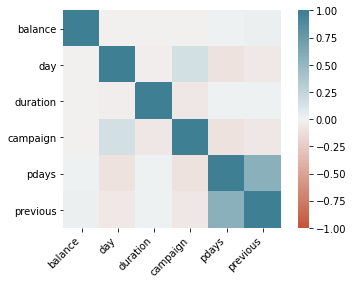

In [11]:
#Observing correlation of variables
corr = bank_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

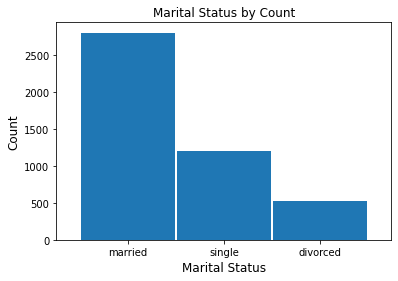

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [16]:
marital = bank_df['marital'].value_counts()
fig = plt.figure()
marital.plot.bar(x ='lab', y='val', rot=0, width=0.98)
plt.title ('Marital Status by Count', fontsize=12)
plt.xlabel('Marital Status', fontsize=12) 
plt.ylabel('Count', fontsize=12)
plt.show()
marital

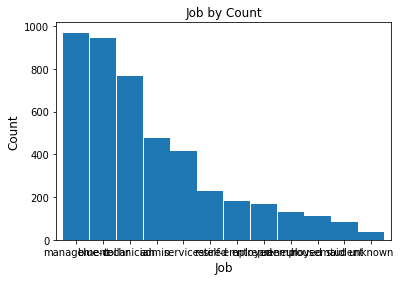

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [17]:
job = bank_df['job'].value_counts()
fig = plt.figure()
job.plot.bar(x ='lab', y='val', rot=0, width=0.98)
plt.title ('Job by Count', fontsize=12)
plt.xlabel('Job', fontsize=12) 
plt.ylabel('Count', fontsize=12)
plt.show()
job

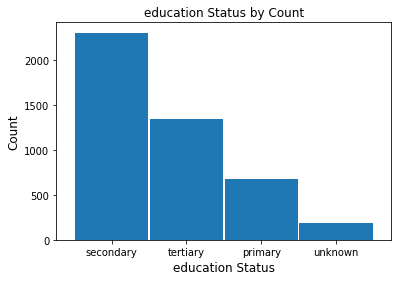

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [18]:
education = bank_df['education'].value_counts()
fig = plt.figure()
education.plot.bar(x ='lab', y='val', rot=0, width=0.98)
plt.title ('Education Status by Count', fontsize=12)
plt.xlabel('Education Status', fontsize=12) 
plt.ylabel('Count', fontsize=12)
plt.show()
education

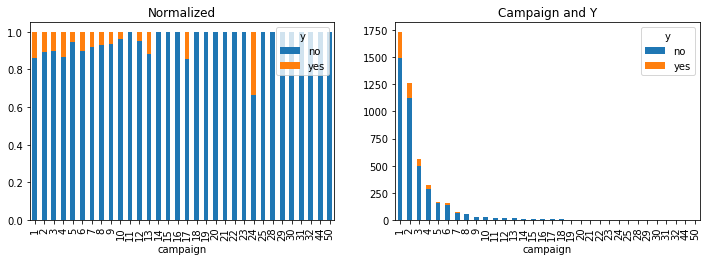

In [23]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)

crosstabdest = pd.crosstab(bank_df['campaign'],bank_df['y'])
crosstabdestnorm = crosstabdest.div(crosstabdest.sum(1), axis = 0)

plotdest = crosstabdest.plot(kind='bar', stacked = True, 
                             title = 'Campaign and Y', 
                             ax = ax1)

plotdestnorm = crosstabdestnorm.plot(kind='bar', stacked = True, 
                                     title = 'Normalized', 
                                     ax = ax2)